In [1]:
%pylab inline
import os
import pandas as pd
from scipy import ndimage

def readSport (energia,nombre):
    base_dir = 'data_'+energia
    data_file = nombre
    df = pd.read_table(os.path.join(base_dir,data_file),sep="\s+",header=61,
                       names=["sats","time","lat","long","velocity","heading","height","longacc","latacc","temp","Vbat","batt-flags","batt-ai","batt.soc"])
    dfFinal=df.drop(['longacc','latacc','Vbat','batt-flags','batt-ai','batt.soc'],axis=1)
    return dfFinal

def readOld (energia,nombre):
    base_dir = 'data_'+energia
    data_file = nombre    
    df = pd.read_table(os.path.join(base_dir,data_file),sep="\s+",header=26)
    df=df.drop(df.index[0])
    dfFinal=df.drop(['vert-vel','pot','event-1'],axis=1)
    return dfFinal

def vGauss(vx):
    vel=ndimage.gaussian_filter1d(vx, sigma=20, order=1, mode='wrap')
    return vel

Populating the interactive namespace from numpy and matplotlib


# Electrico:
## VBS__047.VBO:
* inicio= 345; final=1550
# Combustion:
## VBOX0019.VBO:
* inicio=3000; final=9950
## VBOX0020.VBO:
* inicio=0; final=5475
## VBOX0024.VBO:
* inicio=7560; final=13580

In [2]:
def tiempoVueltaE(energia,nombre,inicio,final):
    sport=readSport(energia,nombre)
    long=sport['long'][inicio:final]
    lat=sport['lat'][inicio:final]
    velocity=sport['velocity'][inicio:final]
    time=np.array(sport['time'][inicio:final])
    tiempoVuelta=time[-1]-time[0]
    dt=(time[-1]-time[-2])/3600
    vel=vGauss(velocity)
    acc=(vel/dt)*(1000/1)*(1/3600)**2#*(1/9.82) #g's
    return [long,lat],time,velocity,acc,tiempoVuelta

def tiempoVueltaC(energia,nombre,inicio,final):
    comb=readOld(energia,nombre)
    long=comb['long'][inicio:final]
    lat=comb['lat'][inicio:final]
    velocity=comb['velocity'][inicio:final]
    time=np.array(comb['time'][inicio:final])
    tiempoVuelta=time[-1]-time[0]
    dt=(time[-1]-time[-2])/3600 #hours
    vel=vGauss(velocity)
    acc=(vel/dt)*(1000/1)*(1/3600)**2#*(1/9.82) #g's
    return [long,lat],time,velocity,acc,tiempoVuelta

### Combustión

#### Datos a analizar (VBOX0019.VBO)

In [3]:
[coord19C,time19C,vel19C,accel19C,tVuelta19C]=tiempoVueltaC('combustion',
                                                            'VBOX0019.VBO',
                                                            3050,9950)
[coord19C2,time19C2,vel19C2,accel19C2,tVuelta19C2]=tiempoVueltaC('combustion',
                                                            'VBOX0019.VBO',
                                                            9950,9950+5750)

mp19=figure(1)
plot(coord19C[0],coord19C[1])
title('Datos iniciales para análisis - combustión - VBOX0019.VBO');xticks([]);yticks([])
#savefig('Mapa vuelta 19C')
plt.close()

vl19=figure(2)
plot(time19C-time19C[0],vel19C,label='vuelta en=%.3f min' % (tVuelta19C/60))
plot(time19C2-time19C2[0],vel19C2,label='vuelta en=%.3f min' % (tVuelta19C2/60))
title('Velocidad vs tiempo');xlabel('Time[s]');ylabel('Velocity[km/h]');legend()
grid('on')
#savefig('Velocidad 19C')
plt.close()

ac19=figure(3)
plot(time19C-time19C[0],accel19C,label='vuelta en=%.3f min' % (tVuelta19C/60))
plot(time19C2-time19C2[0],accel19C2,label='vuelta en=%.3f min' % (tVuelta19C2/60))
title('Aceleración vs tiempo');xlabel('Time[s]');ylabel('Aceleración[$m/s^2$]');legend()
grid('on')
#savefig('Aceleracion 19C')
plt.close()
tProm19C=(tVuelta19C+tVuelta19C2)/(2*60)
print('Tiempo de vuelta promedio = %.3f min'%(tProm19C))

Tiempo de vuelta promedio = 1.721 min


#### Datos a analizar (VBOX0020.VBO)

In [4]:
[coord20C,time20C,vel20C,accel20C,tVuelta20C]=tiempoVueltaC('combustion',
                                                            'VBOX0020.VBO',
                                                            0,5460)
[coord20C2,time20C2,vel20C2,accel20C2,tVuelta20C2]=tiempoVueltaC('combustion',
                                                            'VBOX0020.VBO',
                                                            5475,5475+5400)

mp20=figure(4)
plot(coord20C[0],coord20C[1])
title('Datos para analizar - combustión - VBOX0020.VBO');xticks([]);yticks([])
#savefig('Mapa vuelta 20C')
plt.close()

vl20=figure(5)
plot(time20C-time20C[0],vel20C,label='vuelta en=%.3f min' % (tVuelta20C/60))
plot(time20C2-time20C2[0],vel20C2,label='vuelta en=%.3f min' % (tVuelta20C2/60))
title('Velocidad vs tiempo');xlabel('Time[s]');ylabel('Velocity[km/h]');legend()
grid('on')
#savefig('Velocidad 20C')
plt.close()

ac20=figure(6)
plot(time20C-time20C[0],accel20C,label='vuelta en=%.3f min' % (tVuelta20C/60))
plot(time20C2-time20C2[0],accel20C2,label='vuelta en=%.3f min' % (tVuelta20C2/60))
title('Aceleración vs tiempo');xlabel('Time[s]');ylabel('Aceleración[$m/s^2$]');legend()
grid('on')
#savefig('Aceleracion 20C')
plt.close()
tProm20C=(tVuelta20C+tVuelta20C2)/(2*60)
print('Tiempo de vuelta promedio = %.3f min'%(tProm20C))

Tiempo de vuelta promedio = 1.572 min


#### Datos a analizar (VBOX0024.VBO)

In [21]:
[coord24C,time24C,vel24C,accel24C,tVuelta24C]=tiempoVueltaC('combustion',
                                                            'VBOX0024.VBO',
                                                            7555,13570)
mp24=figure(7)
plot(coord24C[0],coord24C[1])
title('Datos para analizar - combustión - VBOX0024.VBO');xticks([]);yticks([])
#savefig('Mapa vuelta 20C')
plt.close()

vl24=figure(8)
plot(time24C-time24C[0],vel24C,label='vuelta en=%.3f min' % (tVuelta24C/60))
title('Velocidad vs tiempo');xlabel('Time[s]');ylabel('Velocity[km/h]');legend()
grid('on')
#savefig('Velocidad 20C')
plt.close()

ac24=figure(9)
plot(time24C-time24C[0],accel24C,label='vuelta en=%.3f min' % (tVuelta24C/60))
title('Aceleración vs tiempo');xlabel('Time[s]');ylabel('Aceleración[$m/s^2$]');legend()
grid('on')
#savefig('Aceleracion 20C')
plt.close()
tProm24C=tVuelta24C/60
print('Tiempo de vuelta promedio = %.3f min'%(tProm24C))

Tiempo de vuelta promedio = 1.669 min


## Electrico(VBS__047.VBO)

Tiempo de vuelta promedio = 1.670 min


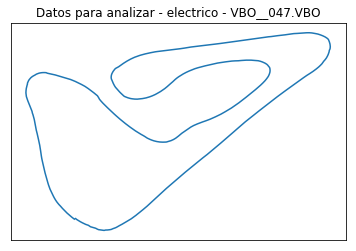

In [22]:
[coord47E,time47E,vel47E,accel47E,tVuelta47E]=tiempoVueltaE('electrico',
                                                            'VBS__047.VBO',
                                                            345,1550)
mpE=figure(10)
plot(coord47E[0],coord47E[1])
title('Datos para analizar - electrico - VBO__047.VBO');xticks([]);yticks([])
#savefig('Mapa vuelta 20C')
#plt.close()

vlE=figure(11)
plot(time47E-time47E[0],vel47E,label='vuelta en=%.3f min' % (tVuelta47E/60))
title('Velocidad vs tiempo');xlabel('Time[s]');ylabel('Velocity[km/h]');legend()
grid('on')
#savefig('Velocidad 20C')
plt.close()

acE=figure(12)
plot(time47E-time47E[0],accel47E,label='vuelta en=%.3f min' % (tVuelta47E/60))
title('Aceleración vs tiempo');xlabel('Time[s]');ylabel('Aceleración[$m/s^2$]');legend()
grid('on')
#savefig('Aceleracion 20C')
plt.close()
print('Tiempo de vuelta promedio = %.3f min'%(tPromE))

## Torque

In [50]:
eficiencia=0.95 #Eficiencia de transmisión
rLl=0.139 #Radio geométrico llantas traseras [m]
r_et=rLl*0.9 #Radio efectivo de las llantas [m]
NcC=11/39 #Relación de transmisión Combustion
NcE=3.2 #Relación de transmisión Electrico
mKart=152#Masa del kart [kg]
mt=1.43
md=1.2
meq=mKart+mt+md
g=9.82 #Gravity [m/s^2]
cg=[-0.2231,0.4875,0.07478]
l=1.0063 #Batalla [m]
r_eje=0.02

def rho(hSNM):
    a=-6.5/1000 #ISA gradient [K/m]
    T0=288.15 #ISA Base temperature
    R=287 # Ideal gas kte [m^2/(s^2-K)]
    h0=0 #ISA Base heigh
    rho0=1.223 #ISA Base density
    T=T0+a*(hSNM-h0)
    rho_h=rho0*(T/T0)**((-g/(a*R))-1)
    return rho_h

#Se modela la rodadura como mRod*a+kteRod
def Rodadura(v,theta,acel):
    A=(meq*g)*(cg[0]/l)
    B=(meq*g)*(1/g*(cg[2]/l)) 
    fr=0.01*(1+((v/3.6)/100))# Factor de rodadura velocidad en [km/h]
    C=fr*np.cos(theta) 
    mRod=B*C
    kteRod=A*C
    Frod=(mRod*acel)+kteRod
    return Frod

def Drag(v,hSNM):
    d_del=0.975 #Distancia entre llantas delanteras [m]
    h=0.88 #Altura con el piloto sentado
    af=(d_del*h)/2 #Área frontal del kart
    cd=0.89 #kart Drag coeficient
    r_et=0.98*rLl
    D=(1/2)*rho(hSNM)*af*cd*v**2
    return D

def Torq (a,v,Nc,theta):
    hSNM=2600
    omega=(v*Nc/(rLl*eficiencia))
    RPM=omega*(60/(2*np.pi))
    Torque=(r_et/(Nc*eficiencia))*(meq*a+Rodadura(v,theta,a)+Drag(v,hSNM))
    Pot=Torque*omega*(1.34/1000)
    return RPM,Torque,Pot

In [51]:
#19 C
[omega19C,torque19C,P19C]=Torq(accel19C,vel19C/3.6,NcC,0)
[omega19C2,torque19C2,P19C2]=Torq(accel19C2,vel19C2/3.6,NcC,0)
#20C
[omega20C,torque20C,P20C]=Torq(accel20C,vel20C/3.6,NcC,0)
[omega20C2,torque20C2,P20C2]=Torq(accel20C2,vel20C2/3.6,NcC,0)
#24C
[omega24C,torque24C,P24C]=Torq(accel24C,vel24C/3.6,NcC,0)
tPromC=(tProm24C+tProm20C+tProm19C)/3
velPromC=(max(vel19C)+max(vel19C2)+max(vel20C)+max(vel20C2)+max(vel24C))/5
accelPromC=(max(accel19C)+max(accel19C2)+max(accel20C)+max(accel20C2)+max(accel24C))/5
torquePromC=(max(torque19C)+max(torque19C2)+max(torque20C)+max(torque20C2)+max(torque24C))/5
#47 E
[omega47E,torque47E,P47E]=Torq(accel47E,vel47E/3.6,NcE,0)
tPromE=tVuelta47E/60
velPromE=max(vel47E)
accelPromE=max(accel47E)
torquePromE=max(torque47E)

pltTC=figure(13)
plot(omega19C,torque19C,label='VBOX0019')
plot(omega20C,torque20C,label='VBOX0020')
plot(omega24C,torque24C,label='VBOX0024')
title('Kart de combustión interna'); xlabel('Velocidad angular [RPM]'); ylabel('Momento Par [Nm]');grid('on')
legend()
plt.close()

pltPC=figure(14)
plot(omega19C,P19C)
xlabel('Velocidad angular [RPM]'); ylabel('Potencia [hp]');grid('on')
plt.close()

pltTE=figure(15)
plot(omega47E,torque47E,label='VBS__047, Electrico')
title('Kart eléctrico'); xlabel('Velocidad angular [RPM]'); ylabel('Momento Par [Nm]');grid('on')
plt.close()

pltPE=figure(14)
plot(omega47E,P47E)
xlabel('Velocidad angular [RPM]'); ylabel('Potencia [hp]');grid('on')
plt.close()

# Informe:

En este caso, este taller pretende comparar el rendimiento real de un kart eléctrico con el de un kart de combustión interna. Esta comparación se realizará utilizando los datos medidos mediante un sistema GPS comercial conocido como $VBOX^{TM}$ el cual permite medir la posición y la velocidad del cuerpo al cual está anclado. Particularmente, en este caso se utilizaron 2 sistemas VBOX diferentes para tomar la medición:
* Para los datos del kart de Combustión interna, se utilizó un VBOX X
* Para los datos del kart electrico se utilizó un VBOX Sport
Ahora, se observa que se tomaron 3 series de datos comparables con el VBOX X, los cuales se muestran a continuación:

### Combustión:

#### Datos iniciales VBOX0019.VBO

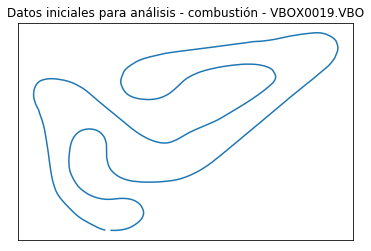

In [52]:
mp19


Donde se puede observar que el recorrido dibujado ayuda a verificar la correcta medición de los datos puesto que se dibuja correctamente el plano del kartodromo Juan Pablo Montoya. En este caso, se tomaron datos de 2 vueltas, las cuales, entendiblemente marcaron 2 tiempos de vuelta diferentes, especificamente un mayor tiempo de vuelta para la primera vuelta, mientras que un menor tiempo para la segunda vuelta:

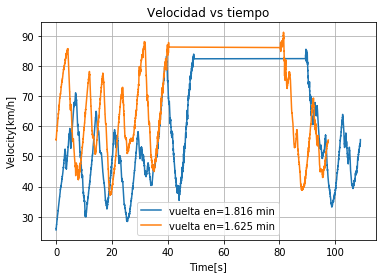

In [53]:
vl19

Se observa que la velocidad pico de estas 2 vueltas es de aproximadamente 90 $km/h$ y se presenta un tiempo de vuelta promedio para esta medición de 1.72 min, con un perfíl de aceleración como se muestra a continuación: 

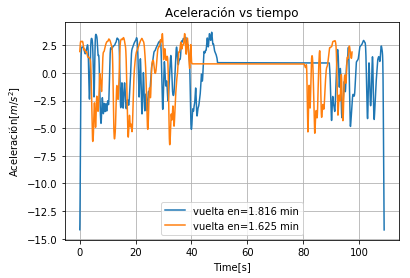

In [54]:
ac19


En donde se observa que se presenta una aceleración pico de 3.75 $m/s^2$, lo que se traduce en un momento par en el eje de 294.25 $Nm$.

#### Datos segunda medición (VBOX0020.VBO)

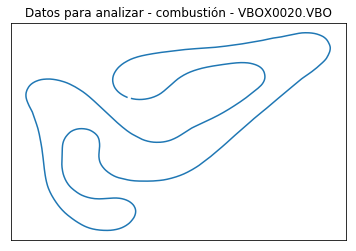

In [28]:
mp20

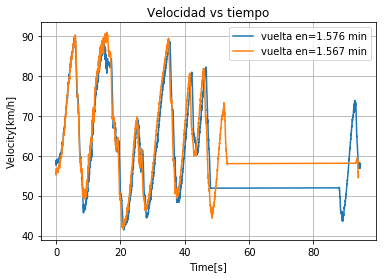

In [29]:
vl20

En este caso se observa una menor cantidad en los picos de velocidad y una suavidad de la curva mucho más marcada que en el caso inicial; además que se muestra una similitud representativa entre los datos de la primera vuelta con los de la segunda en esta medición. Todo esto puede deberse a 2 razones:
* Se calibró mejor el dispositivo GPS, ya sea en su soporte físico o en su "back-end", ya que el movimiento relativo de este con respecto al vehículo es un gran generador de ruido en la medición.
* El piloto del kart, al conocer mejor la pista y el vehículo en si, adquiere un poco más de pericia al volante y debido a esto se observan 2 curvas muy similares la una de la otra inclusive en su tiempo de vuelta.

A continuación, para aclarar un poco la situación, se muestra una curva de aceleración contra tiempo para esta medición:

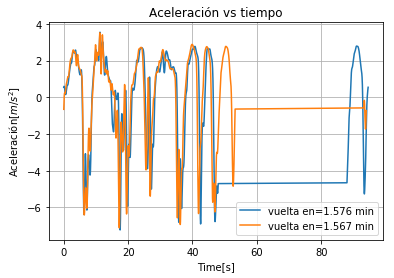

In [30]:
ac20

A la luz de esto, se puede observar que lo más probable es que la razón haya sido la segunda, puesto que si se observa una clara periodicidad en la variación de la aceleración pero con una variación al final, lo que indicaría una pequeña adición de pericia humana por parte del piloto.

En todo caso, dada esta conclusión, es muy dificil en este momento discernir mucho a partir de los datos presentados hasta el momento, a parte de que la velocidad y la aceleración pico no han variado mucho y que parece haber un espacio en la pista donde la aceleración y la velocidad tienen un valor constante 

Para terminar de evaluar el caso del kart de combustión, se presentan los datos de la ultima medición efectiva de este vehículo, en donde se presentó una suavidad mucho más marcada sobretodo en los datos de aceleración y donde se muestra una aceleración pico de 3.19 $m/s^2$, una velocidad pico de 86.89 $km/h$ y un torque máximo de 282.46 $Nm$ 

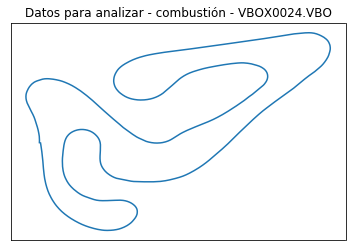

In [57]:
mp24

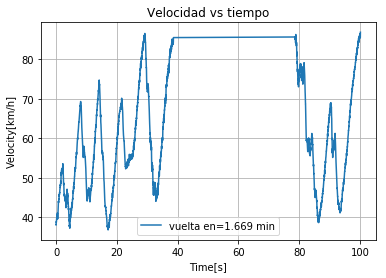

In [58]:
vl24

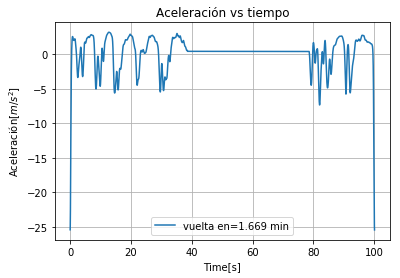

In [59]:
ac24

Para finalizar el análisis del vehículo de combustión, se observa que en promedio este kart alcanza estos valores pico:
* velocidad máxima =88.98 $km/h$
* Aceleración máxima =3.50 $m/s^2$
* Torque máximo alcanzado =280.44 $Nm$
* Tiempo de vuelta promedio =1.65 $min$

También fue posible visualizar las siguientes curvas de Momento Par y potencia vs Velocidad angular respectivamente:

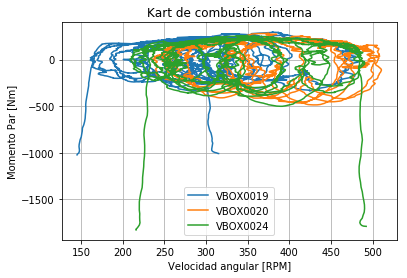

In [61]:
pltTC

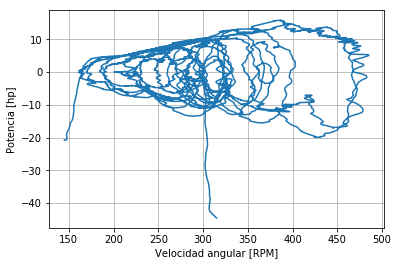

In [62]:
pltPC

### Electrico

Lamentablemente, para el caso del kart electrico, solo fue posible adquirir solamente una serie de datos, obteniendo los siguientes resultados:
* velocidad máxima =83.53 $km/h$
* Aceleración máxima =1.51 $m/s^2$
* Torque máximo alcanzado =10.57 $Nm$
* Tiempo de vuelta promedio =1.67 $min$

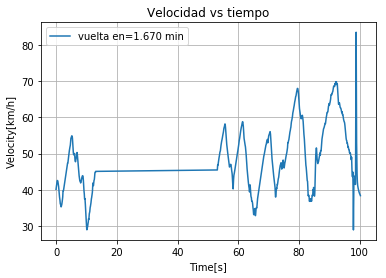

In [71]:
vlE

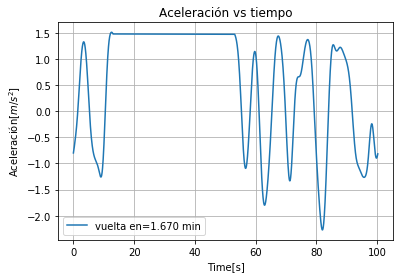

In [72]:
acE

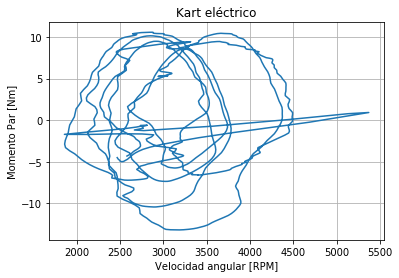

In [65]:
pltTE

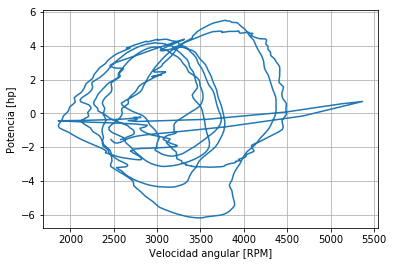

In [66]:
pltPE

En este caso se puede observar que aunque el tiempo de vuelta es muy similar en ambos casos, la potencia consumida por el kart eléctrico es mucho más baja, lo que significa que si se aumentara un poco esta, el tiempo de vuelta disminuiría mucho más,se propone instalar una batería adicional o un variador de frecuencia con el fin de proporcionar una potencia más alta al kart y así lograr un tiempo de vuelta menor